# Rethinking the Alphabet and its Words

**by Won Moon Joo** 

**wmj212@nyu.edu**

**Data Bootcamp**

**12/22/17**

Some Definitions:

Vowel: a speech sound that is produced by comparatively open configuration of the vocal tract

Consonant: a basic speech sound in which the breath is at least partly obstructed and which can be combined with a vowel to form a syllable


The origins of language can be traced back to its spoken history. English, as we know it today, was formed into a written context through its use of vowels and consonants. In this project, I attempt to move away from such an aural understanding of English, into a written, "codified" form which translates into a faster and more literal method.

The project:
1. Will explore different lists of words
2. Attempt to find a method to remove vowels of words while maintaining definitions
3. Implement found methods onto a real work of literature (problems found: see below)


# The Packages

Below are the packages necessary:

In [37]:
#import necessary packages
import os #key tool
import pandas as pd #key tool
import re #Regular Expressions packages to help manupulate strings
import numpy as np #numerical operations
import matplotlib.pyplot as plt #useful package to plot data
from io import BytesIO #to open and read through .zip and .txt files
from zipfile import ZipFile #to open .zip files
from urllib.request import urlopen #to open and read through .zip and .txt files

# Data Set One

The first data set we will look at is a general compliation of 194,000 English words found at !JustWords (http://www.gwicks.net/dictionaries.htm).

The url gives us the data in a .zip file, so the zipfile Package is used to obtain the .txt file within.



In [38]:
#obtaining data from the web

#!JustWords
url = urlopen('http://www.gwicks.net/textlists/english3.zip')

zf = ZipFile(BytesIO(url.read()))

english = pd.read_csv(zf.open('english3.txt'), header = None)

english = english.rename(columns={0: 'Words'})

#Change 'Words' to str
english['Words']=english['Words'].astype(str)

In [39]:
english.head(10)

,Words
0,a
1,aa
2,aaa
3,aachen
4,aardvark
5,aardvarks
6,aardwolf
7,aardwolves
8,aarhus
9,aaron


Here the .head() function shows us the first 10 words of the list.

**Part 1:
A. Removing All Vowels**

First, we will indiscrimately remove all vowels in a given word. We create a function, removeVowels, that implements the Regular Expressions package to achieve this.

In [40]:
#create a function 'removeVowels' which takes out all vowels in a word

def removeVowels(s):
    result = re.sub(r'[aeiou]', '', s)
    return result

We apply the function removeVowels to the dataframe english, and create a new column, Vowels Removed.

In [41]:
#create new column 'Vowels Removed' by applying removeVowels function on 'Words'

english['Vowels Removed'] = english['Words'].apply(removeVowels)



In [42]:
english.head(10)

,Words,Vowels Removed
0,a,
1,aa,
2,aaa,
3,aachen,chn
4,aardvark,rdvrk
5,aardvarks,rdvrks
6,aardwolf,rdwlf
7,aardwolves,rdwlvs
8,aarhus,rhs
9,aaron,rn


As shown above, we see two columns: the original words and words with all vowels removed. Removing all vowels in a word (especially when we are looking at the beginning of the list: words starting with "a", leaves the words unreadable.

**Part 2: Exceptions: First and Last Vowels.**

The first exception is to ignore vowels which start and end a word.

To allow for exceptions in removing vowels, some vowels will be capitalized (so that it is ignored by function removeVowels)

Note: There are probably more efficient ways to do this i.e. create functions that include exceptions without use of capitalization

We create a new function, capFirstLast, which capitalizes the first and last letters of a word.

In [43]:
#create new function that capitalizes first and last letter
def capFirstLast(s):
    result = s[0].capitalize() + s[1:-1] + s[-1].capitalize()
    return result

We apply the function, capFirstLast, to the original words list, and then apply function removeVowels.

In [44]:
#apply function capFirstLast to create a new column
english['Vowels Removed EXCPT First and Last'] = english['Words'].apply(capFirstLast)

#apply function removeVowels to remove all lowercase vowels
english['Vowels Removed EXCPT First and Last'] = english['Vowels Removed EXCPT First and Last'].apply(removeVowels)


In [45]:
english.head(10)

,Words,Vowels Removed,Vowels Removed EXCPT First and Last
0,a,,AA
1,aa,,AA
2,aaa,,AA
3,aachen,chn,AchN
4,aardvark,rdvrk,ArdvrK
5,aardvarks,rdvrks,ArdvrkS
6,aardwolf,rdwlf,ArdwlF
7,aardwolves,rdwlvs,ArdwlvS
8,aarhus,rhs,ArhS
9,aaron,rn,ArN


Now its looking much better! At least the words starting with "a" are recognizable. One more exception to add...

**Part 2: Exceptions: Consecutive Vowels**

Similar to the First and Last Vowels function, all consecutive vowels will be capitalized so they will not be removed



We create two new functions, cap and capConsecVowels. By combining the two functions, and using the regular expressions package, we are able to capitalize any combinations of consecutive vowels.

In [46]:
#create function caps which capitalizes a string
def cap(s):
    return s.group(0).upper()

#create function consecVowels which capitalizes all consecutive vowels
def capConsecVowels(s):
    result = re.sub(r'([aeiou]){2,5}', cap, s)
    return result

We apply the function capConsecVowels onto a new column, Vowels Removed EXCPT Consec,
and then apply removeVowels.

In [47]:
#apply consecVowels function to create a new column
english['Vowels Removed EXCPT Consec'] = english['Words'].apply(capConsecVowels)


#apply function removeVowels to remove all lowercase vowels
english['Vowels Removed EXCPT Consec'] = english['Vowels Removed EXCPT Consec'].apply(removeVowels)

In [48]:
english.head(10)

,Words,Vowels Removed,Vowels Removed EXCPT First and Last,Vowels Removed EXCPT Consec
0,a,,AA,
1,aa,,AA,AA
2,aaa,,AA,AAA
3,aachen,chn,AchN,AAchn
4,aardvark,rdvrk,ArdvrK,AArdvrk
5,aardvarks,rdvrks,ArdvrkS,AArdvrks
6,aardwolf,rdwlf,ArdwlF,AArdwlf
7,aardwolves,rdwlvs,ArdwlvS,AArdwlvs
8,aarhus,rhs,ArhS,AArhs
9,aaron,rn,ArN,AArn


We see here now, words that start with the double "aa" have their vowels kept. So far so good.

**Part 3: Putting Everything Together**

The two exceptions will be applied to the original column 'Words'

Meaning that first and last vowels, consecutive vowels will be kept.

Note: it is important that we apply capConsecVowels first: to avoid mistakes on words that start with two vowels

eg. aachen - if we cap first and last to AacheN, capConsecVowels will ignore 'Aa', because it is not 'aa'

In [49]:
#apply capConsecVowels function
english['Vowels Removed with EXCPT A and B'] = english['Words'].apply(capConsecVowels)

#apply function capFirstLast
english['Vowels Removed with EXCPT A and B'] = english['Vowels Removed with EXCPT A and B'].apply(capFirstLast)

#apply function removeVowels
english['Vowels Removed with EXCPT A and B'] = english['Vowels Removed with EXCPT A and B'].apply(removeVowels)

#make all words lowercase for visibility into new column Final
english['FinalList'] = english['Vowels Removed with EXCPT A and B'].str.lower()

In [50]:
english.head(10)

,Words,Vowels Removed,Vowels Removed EXCPT First and Last,Vowels Removed EXCPT Consec,Vowels Removed with EXCPT A and B,FinalList
0,a,,AA,,AA,aa
1,aa,,AA,AA,AA,aa
2,aaa,,AA,AAA,AAA,aaa
3,aachen,chn,AchN,AAchn,AAchN,aachn
4,aardvark,rdvrk,ArdvrK,AArdvrk,AArdvrK,aardvrk
5,aardvarks,rdvrks,ArdvrkS,AArdvrks,AArdvrkS,aardvrks
6,aardwolf,rdwlf,ArdwlF,AArdwlf,AArdwlF,aardwlf
7,aardwolves,rdwlvs,ArdwlvS,AArdwlvs,AArdwlvS,aardwlvs
8,aarhus,rhs,ArhS,AArhs,AArhS,aarhs
9,aaron,rn,ArN,AArn,AArN,aarn


We can take a look at column FinalList to see what the words look like now.

In [51]:
english[100:110]

,Words,Vowels Removed,Vowels Removed EXCPT First and Last,Vowels Removed EXCPT Consec,Vowels Removed with EXCPT A and B,FinalList
100,abbotsbury,bbtsbry,AbbtsbrY,bbtsbry,AbbtsbrY,abbtsbry
101,abbotship,bbtshp,AbbtshP,bbtshp,AbbtshP,abbtshp
102,abbotships,bbtshps,AbbtshpS,bbtshps,AbbtshpS,abbtshps
103,abbott,bbtt,AbbtT,bbtt,AbbtT,abbtt
104,abbreviate,bbrvt,AbbrvtE,bbrvIAt,AbbrvIAtE,abbrviate
105,abbreviated,bbrvtd,AbbrvtD,bbrvIAtd,AbbrvIAtD,abbrviatd
106,abbreviates,bbrvts,AbbrvtS,bbrvIAts,AbbrvIAtS,abbrviats
107,abbreviating,bbrvtng,AbbrvtnG,bbrvIAtng,AbbrvIAtnG,abbrviatng
108,abbreviation,bbrvtn,AbbrvtN,bbrvIAtIOn,AbbrvIAtION,abbrviation
109,abbreviations,bbrvtns,AbbrvtnS,bbrvIAtIOns,AbbrvIAtIOnS,abbrviations


Lets take a look at another part of the list, just to make sure everything is correct.

abbott -> abbtt

abbreviate -> abbrviate

# Date Set Two

**Part 4: Same thing but on a smaller list**

We apply the same functions as above to a list I found on github: https://gist.github.com/deekayen/4148741
This is a list of the most commonly used 1000 English words.

Steps are same as above. The new list is called common

In [52]:
url = 'https://gist.githubusercontent.com/deekayen/4148741/raw/01c6252ccc5b5fb307c1bb899c95989a8a284616/1-1000.txt'

common = pd.read_csv(url, header = None)


#rename first column into 'Words'
common = common.rename(columns={0: 'Words'})

#Change 'Words' to str
common['Words']= common['Words'].astype(str)

#apply capConsecVowels function
common['FinalList'] = common['Words'].apply(capConsecVowels)

#apply function capFirstLast
common['FinalList'] = common['FinalList'].apply(capFirstLast)

#apply function removeVowels
common['FinalList'] = common['FinalList'].apply(removeVowels)

#make all words lowercase for visibility into new column Final
common['FinalList'] = common['FinalList'].str.lower()



In [53]:
common.head(20)

,Words,FinalList
0,the,the
1,of,of
2,to,to
3,and,and
4,a,aa
5,in,in
6,is,is
7,it,it
8,you,you
9,that,tht


It seems like the vowel removing is successful. Although, the words are much shorter, and not too many vowels were removed as a result.

# Analysis

How many DISTINCT words do we get? How many duplicates are made, as a result of vowels being removed?


In [54]:
#For COMMON


#find count of how many distinct words we get
commonAnalysis = common.FinalList.value_counts()

#change Series into Dataframe
commonAnalysis = commonAnalysis.to_frame('Count')

#count how many of each unqiue value there are
commonCounter = commonAnalysis.apply(pd.value_counts)


#For ENGLISH

#find count of how many distinct words we get
englishAnalysis = english.FinalList.value_counts()

#change Series into Dataframe
englishAnalysis = englishAnalysis.to_frame('Count')

#count how many of each unqiue value there are
englishCounter = englishAnalysis.apply(pd.value_counts)

In [55]:
commonAnalysis.head()

,Count
ht,4
fll,4
by,3
thn,3
bt,3


The above shows that after vowels were removed, there are 4 duplicates of the word "fll", 4 duplicates of the word "ht" and so on...

In [56]:
commonCounter.head()

,Count
1,845
2,63
3,7
4,2


The above shows that there are 845 unique words. There are 63 words that have 2 duplicates, 7 words which have 3 duplicates, and 2 words that have 4 duplicates.

Not too bad...

**Some graphs**

We will plot the graphs of commonAnalysis and englishAnalysis. This will show how many duplicates there are of a certain word.


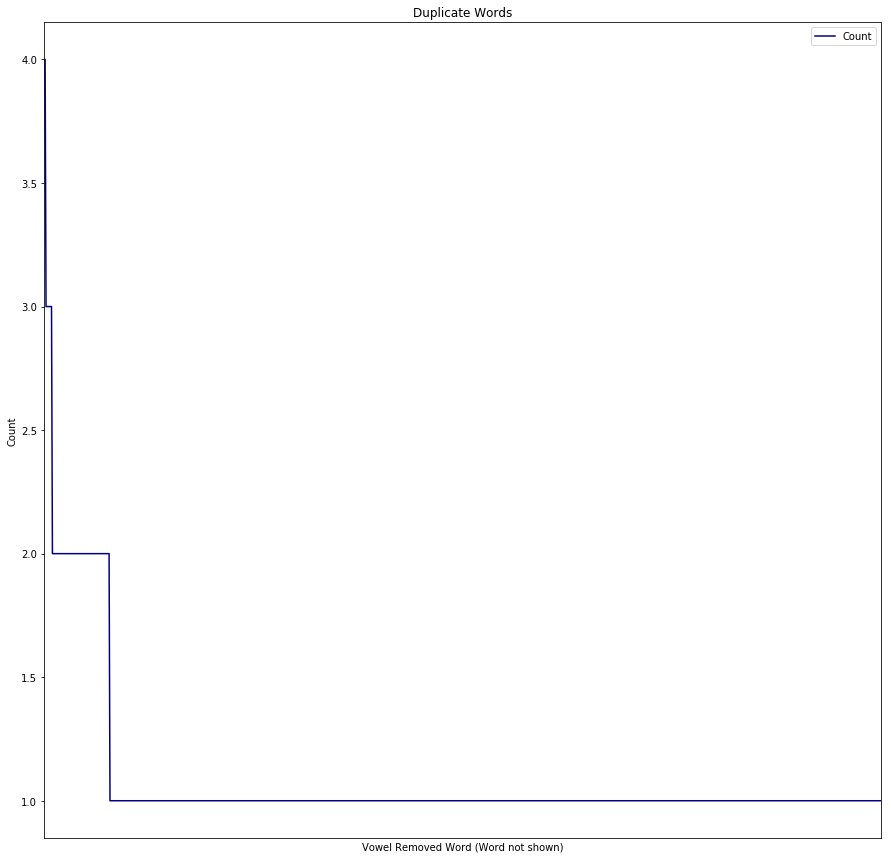

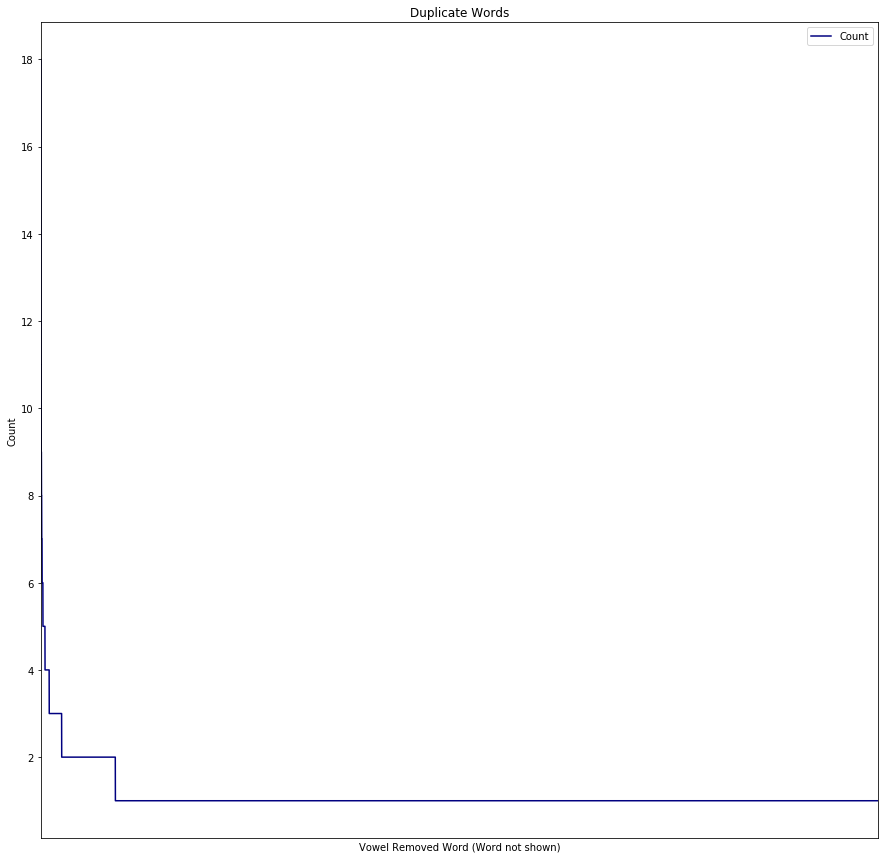

In [57]:
#for COMMON
DuplicateWordsCommon = commonAnalysis.plot(x=commonAnalysis.index, y = 'Count', title = 'Duplicate Words', xticks =[], colormap='jet', figsize = (15,15))
DuplicateWordsCommon.set(xlabel="Vowel Removed Word (Word not shown)", ylabel="Count")
plt.show()

#for ENGLISH
DuplicateWordsEnglish = englishAnalysis.plot(x=englishAnalysis.index, y = 'Count', title = 'Duplicate Words', yticks= [2,4,6,8,10,12,14,16,18], xticks =[], colormap='jet', figsize = (15,15))
DuplicateWordsEnglish.set(xlabel="Vowel Removed Word (Word not shown)", ylabel="Count")
plt.show()


The above graphs are heavily skewed to words with a count of 1 (no duplicates), so we will ignore some of the data to get a better look.


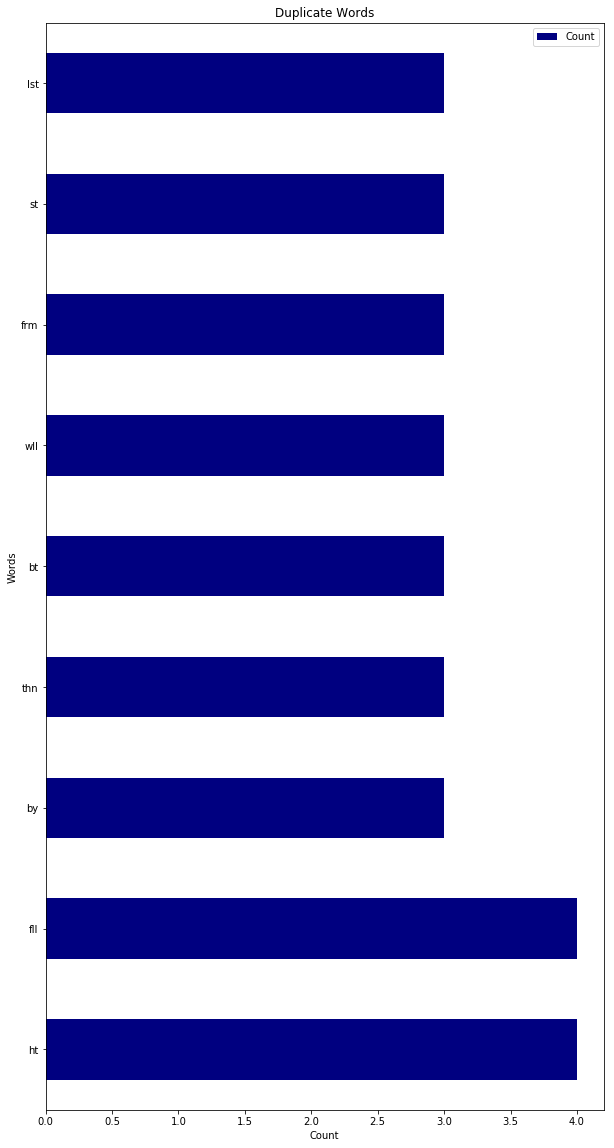

In [58]:
#These barplots also show the specific word

#for COMMON
#ignore any words with less than 2 duplicates
DuplicateWordsCommon = commonAnalysis.plot.barh(x=commonAnalysis.index, y = commonAnalysis['Count']>2, title = 'Duplicate Words' , colormap='jet', figsize = (10,20))
DuplicateWordsCommon.set(ylabel="Words", xlabel="Count")
plt.show()

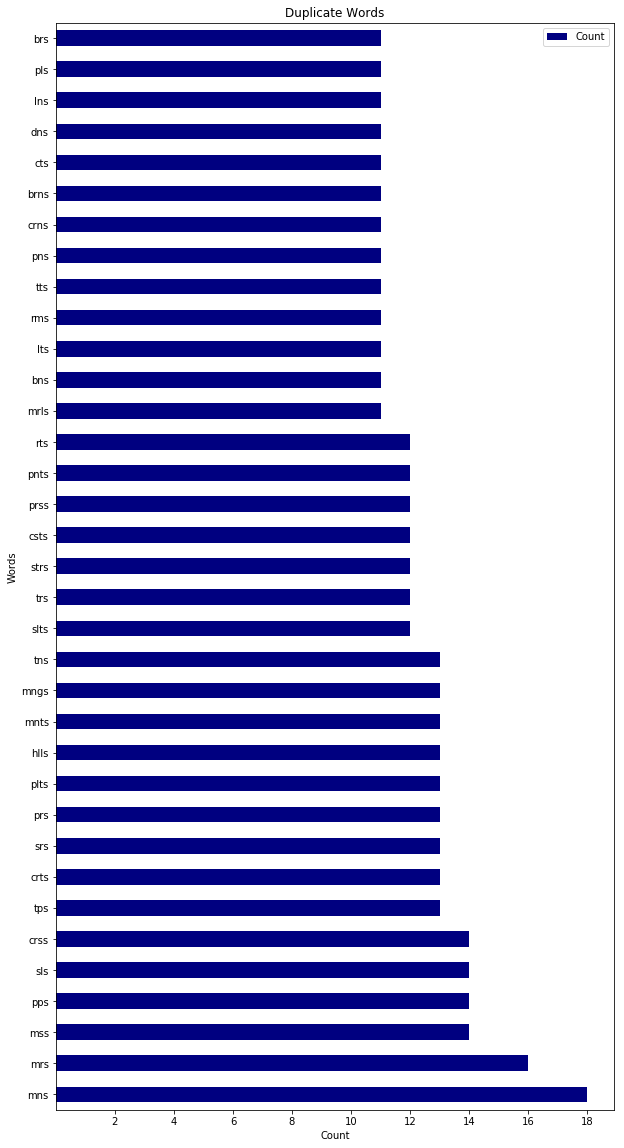

In [59]:
#for ENGLISH
#ignore any words with less than 10 duplicates
DuplicateWordsEnglish = englishAnalysis.plot.barh(x=englishAnalysis.index, y = englishAnalysis['Count'] >10, xticks = [2,4,6,8,10,12,14,16,18], title = 'Duplicate Words', colormap='jet', figsize = (10,20))
DuplicateWordsEnglish.set(ylabel="Words", xlabel="Count")
plt.show()

These barcharts show the exact word which has duplicates and how many duplicates of each there are.

"mns" is the word with the most duplicates...

**More Graphs**

Here we graph commonCounter and englishCounter. This shows how many words have duplicates.

/Users/joo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


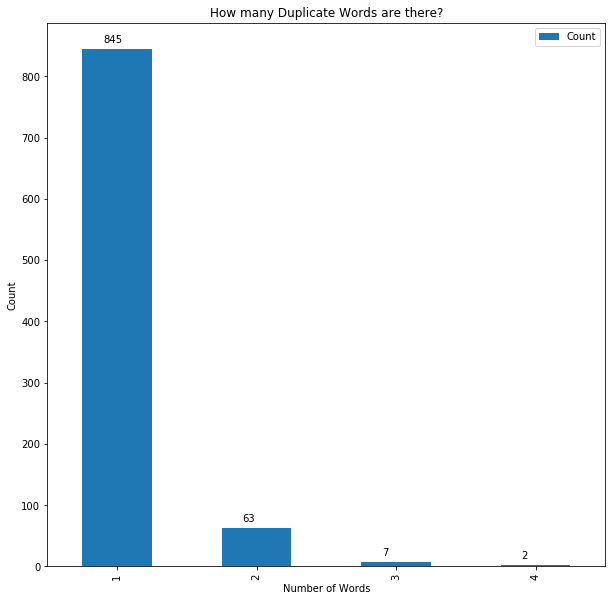

/Users/joo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


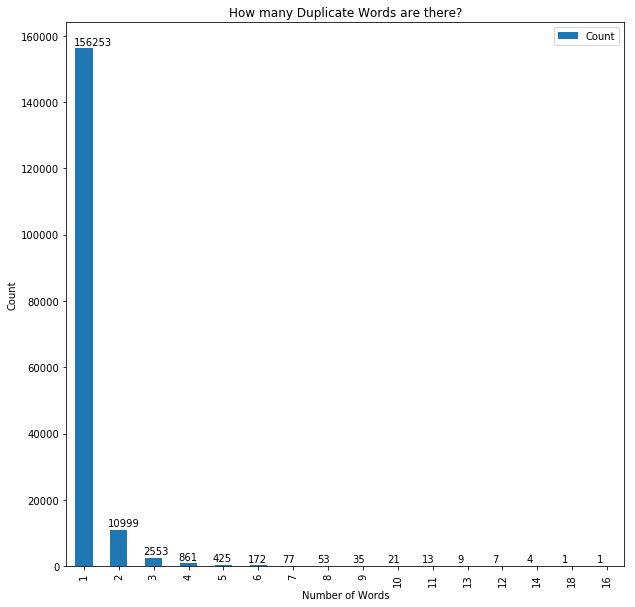

In [60]:
#Count of Number of Duplicate Words

#For COMMON
CountDupWordsCommon = commonCounter.plot(kind='bar',x=commonCounter.index, y = 'Count', title = 'How many Duplicate Words are there?', figsize = (10,10))
CountDupWordsCommon.set(xlabel="Number of Words", ylabel="Count")
for i, label in enumerate(list(commonCounter.index)):
    score = commonCounter.ix[label]['Count']
    CountDupWordsCommon.annotate(str(score), (i -.1, score+ 10))
    
plt.show()

#Count of Number of Duplicate Words
CountDupWordsEnglish = englishCounter.plot(kind='bar',x=englishCounter.index, y = 'Count', title = 'How many Duplicate Words are there?', figsize = (10,10))
CountDupWordsEnglish.set(xlabel="Number of Words", ylabel="Count")
for i, label in enumerate(list(englishCounter.index)):
    score = englishCounter.ix[label]['Count']
    CountDupWordsEnglish.annotate(str(score), (i -.3, score+ 1000))
    
plt.show()

The above graphs shows that even after vowels are removed (with certain exceptions) we have 845 and 156253 unique words in our lists, common and english.

Thats a lot of words that are still unique, even after we remove characters from it...

But what's the point?
Well... let's see how many characters are eliminated from our vowel removing.

# Efficiency

How many characters are removed?

To do this, we take the sum of the lengths of the words before and after vowels are removed. We do this for both common and english.

/Users/joo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


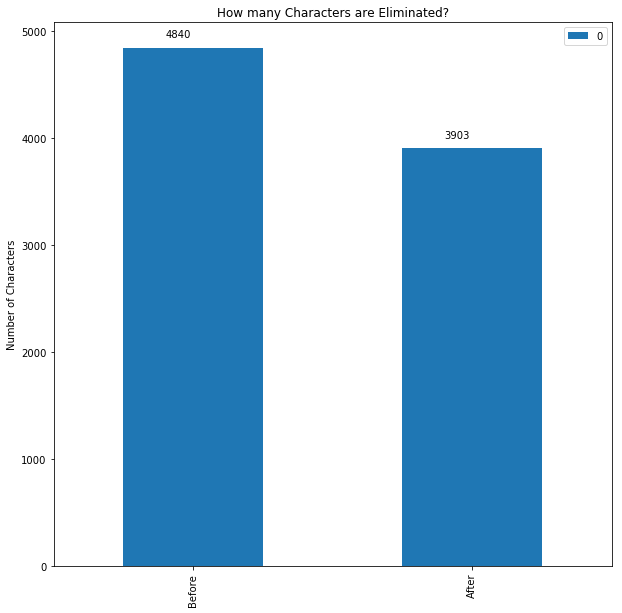

In [61]:
#length difference before and after for COMMON

#This is asssuming all words are unique, which they are not
common['Length Before'] = common['Words'].str.len()
common['Length After'] = common['FinalList'].str.len()

#Creating a new DataFrame but summing all lengths Before/After
values = [common['Length Before'].sum(),common['Length After'].sum()]
BeforeAfterCommon = pd.DataFrame(values, index = ('Before','After'))

#creating a graph of the number of characters
BeforeAfterGraphCommon = BeforeAfterCommon.plot.bar(title = 'How many Characters are Eliminated?', figsize=(10,10))
BeforeAfterGraphCommon.set(ylabel="Number of Characters")
for i, label in enumerate(list(BeforeAfterCommon.index)):
    score = BeforeAfterCommon.ix[label][0]
    BeforeAfterGraphCommon.annotate(str(score), (i -.1, score+ 100))
plt.show()

For dataset common, the number of characters drops from 4840 to 3903. Thats almost a 20% drop in characters!

/Users/joo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


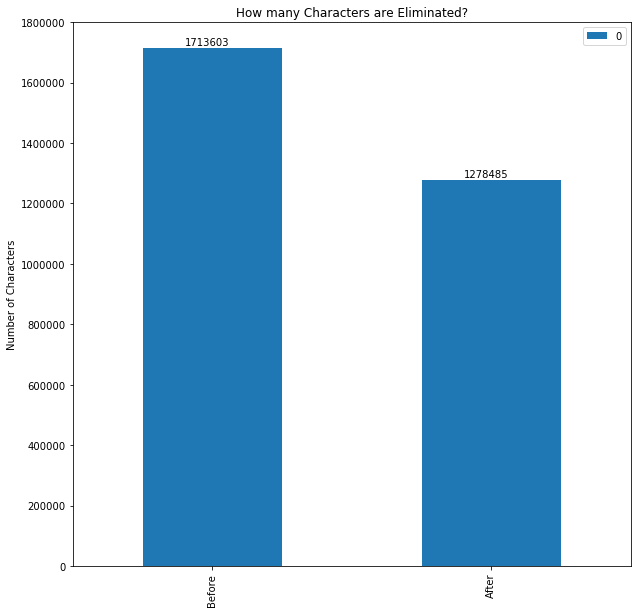

In [62]:
#length difference before and after for ENGLISH

#This is asssuming all words are unique, which they are not
english['Length Before'] = english['Words'].str.len()
english['Length After'] = english['FinalList'].str.len()

#Creating a new DataFrame but summing all lengths Before/After
values = [english['Length Before'].sum(),english['Length After'].sum()]
BeforeAfterEnglish = pd.DataFrame(values, index = ('Before','After'))

#creating a graph of the number of characters
BeforeAfterGraphEnglish = BeforeAfterEnglish.plot.bar(title = 'How many Characters are Eliminated?', figsize=(10,10))
BeforeAfterGraphEnglish.set(ylabel="Number of Characters")
for i, label in enumerate(list(BeforeAfterEnglish.index)):
    score = BeforeAfterEnglish.ix[label][0]
    BeforeAfterGraphEnglish.annotate(str(score), (i -.1, score+ 10000))
plt.show()

For dataset english, the number of characters drops from 1713603 to 1278485. Thats another 20% drop in characters!

**More on Efficiency**

But we are forgetting one thing. Not all the words were unique! That means we are losing understanding of words which have duplicates. So let's only count characters of words which are unique.

First we merge the words from commonAnalysis which have a 'Count' of 1 (meaning that are unique), with our original common list.

In [63]:
nodup = commonAnalysis[commonAnalysis['Count'] == 1]
nodup['FinalList'] = nodup.index

#Create a new dataframe of values that have NO DUPLICATES with a merge onto nodup; list of words with NO duplicates
CommonNoDup = pd.merge(nodup, common,
                       on='FinalList',
                       how='left',
                       indicator = True
                       )

/Users/joo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
CommonNoDup.head(10)

,Count,FinalList,Words,Length Before,Length After,_merge
0,1,our,our,3,3,both
1,1,hppy,happy,5,4,both
2,1,chrge,charge,6,5,both
3,1,instnt,instant,7,6,both
4,1,neighbr,neighbor,8,7,both
5,1,pound,pound,5,5,both
6,1,pplte,populate,8,5,both
7,1,again,again,5,5,both
8,1,sea,sea,3,3,both
9,1,able,able,4,4,both


The new list CommonNoDup has words that are unique and leaves out any words with duplicates. Let us also do this for list english.

In [65]:
nodup = englishAnalysis[englishAnalysis['Count'] == 1]
nodup['FinalList'] = nodup.index

#Create a new dataframe of values that have NO DUPLICATES with a merge onto nodup; list of words with NO duplicates
EnglishNoDup = pd.merge(nodup, english,
                       on='FinalList',
                       how='left',
                       indicator = True
                       )

/Users/joo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [66]:
EnglishNoDup.head()

,Count,FinalList,Words,Vowels Removed,Vowels Removed EXCPT First and Last,Vowels Removed EXCPT Consec,Vowels Removed with EXCPT A and B,Length Before,Length After,_merge
0,1,hrdshps,hardships,hrdshps,HrdshpS,hrdshps,HrdshpS,9,7,both
1,1,syphnd,syphoned,syphnd,SyphnD,syphnd,SyphnD,8,6,both
2,1,icnphlsm,iconophilism,cnphlsm,IcnphlsM,cnphlsm,IcnphlsM,12,8,both
3,1,trclours,tricolours,trclrs,TrclrS,trclOUrs,TrclOUrS,10,8,both
4,1,footlng,footling,ftlng,FtlnG,fOOtlng,FOOtlnG,8,7,both


**Percent Reduction**

Let's calculate the percent reduction, before and after vowel removing, for only unique words.

In [67]:
#Calculating Percent Reduction for ENGLISH
(EnglishNoDup['Length Before'].sum() - EnglishNoDup['Length After'].sum())/ EnglishNoDup['Length Before'].sum()

0.24796815586893217

In [68]:
#Calculating Percent Reduction for COMMON
(CommonNoDup['Length Before'].sum() - CommonNoDup['Length After'].sum())/ CommonNoDup['Length Before'].sum()

0.18366863905325445

For english, we have a 24.8% reduction in characters!

For common, we have a 18.4% reduction in characters!

# Conclusion

The point of removing vowels, while maintaining meaning in words is to delete any extraneous characters.

For example, there are 156253 words in the English dictionary that can have their vowels removed, and yet remain unique. With a ~20% reduction in the number of characters by doing so, that's a lot of space we are wasting!

**Afterword**

So I was planning on implementing the same functions of vowel removing on an actual piece of literature: the Brown Corpus, a collection of texts. (http://www.sls.hawaii.edu/bley-vroman/brown.txt)

This is critical because obviously, there are so many words in the English dictionary that we don't use. What is most important is whether vowel removing is actually meaningful to the few hundreds of commonly used English words.

Zipf's Law states that the most commonly used word appears twice as much as the second, three times as much as the third, and so on. That means that the effectiness of vowel removing will decrease heavily as it is implemented on less frequently used words.

However, I was unable to parse the text in the online .txt files (it kept reading the text as having multiple columns).
It would be great to see if the logx and logy relationship of Zipf's Law would hold, under vowel removing.

Yet, in my analysis of the 1000 most commonly used words, we have a 18.4% reduction in the number of characters used. That's a huge reduction of extraneous characters!

I imagine that in a database, a computer would automatically delete the vowels and store the plain words. When the time comes for a user to read the text, the computer can simply parse the text, and input the vowels from its "vowels dictionary converter."